# Predicting Housing Prices in King County, Washington

#### Griffin Hudley, Malcolm Katzenbach, and Lauren Phipps

***

### Overview  <a id="Overview"></a>

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

[1. Business Problem](#Business-Problem)

[2. Data Understanding](#Data-Understanding)

[3. Data Cleaning](#Data-Cleaning)

[4. Data Modeling](#Data-Modeling)

[5. Evaluation](#Evaluation)

[6. Conclusion](#Conclusion)

***

## Business Problem  <a id="Business-Problem"></a>

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

What are the business's pain points related to this project?
How did you pick the data analysis question(s) that you did?
Why are these questions important from a business perspective?

***

## Data Understanding  <a id="Data-Understanding"></a>

The data being used is publicly available housing data from King County, Washington from 2014-2015. The dataset contains ~21,600 rows, with each row representing the sale of a house in King County. The columns represent features of that house. The target variable is the price of the house, which will be used to determine the effect of several features on houses.  Prior to any data analysis, the test data is split from the training data to prevent data leakage. The split is 80% training, 20% testing.  

Questions to consider:

Where did the data come from, and how do they relate to the data analysis questions?
What do the data represent? Who is in the sample and what variables are included?
What is the target variable?
What are the properties of the variables you intend to use?

Import packages, run code, explore data
***

In [1]:
import datacleaning as dc
import linregvis as lrv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyRegressor
from statsmodels.graphics.regressionplots import abline_plot
%matplotlib inline
sns.set_style('darkgrid')
pd.options.display.float_format = "{:,.2f}".format
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick

In [2]:
df = dc.test_split(
    dc.get_data('data/kc_house_data.csv')
)
X_train = df[0]
X_test = df[1]
y_train = df[2]
y_test = df[3]

X_train.head()

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
5052   6744700285  3/11/2015         4       3.50         3270     15160   
8658   3630010040  5/23/2014         3       2.00         1540      1827   
16841  2881700231  4/22/2015         3       1.75         1440     11364   
9439   2312400230  9/24/2014         3       2.25         1810     12000   
21301  1732800199  5/11/2015         2       2.50         1680       977   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
5052     1.00        0.00  2.00          3      8        1660        1610.0   
8658     2.00        0.00  0.00          3      8        1540           0.0   
16841    1.00        0.00  0.00          3      7        1440           0.0   
9439     2.00        0.00  0.00          3      7        1810           0.0   
21301    3.00        0.00  0.00          3      9        1680           0.0   

       yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
5052       1997           nan    98155 47.74 -122.29           2790   
8658       2005          0.00    98029 47.55 -122.00           1540   
16841      1985          0.00    98155 47.74 -122.33           1950   
9439       1992          0.00    98003 47.35 -122.30           1720   
21301      2009          0.00    98119 47.63 -122.36           1680   

       sqft_lot15  
5052        15160  
8658         1827  
16841        9390  
9439         9916  
21301         977

In [3]:
X_train.describe()

id  bedrooms  bathrooms  sqft_living     sqft_lot  \
count        17,277.00 17,277.00  17,277.00    17,277.00    17,277.00   
mean  4,576,436,161.86      3.37       2.12     2,085.54    15,233.44   
std   2,879,359,277.94      0.90       0.77       924.04    41,780.09   
min       1,000,102.00      1.00       0.50       370.00       520.00   
25%   2,115,510,330.00      3.00       1.75     1,430.00     5,050.00   
50%   3,904,902,630.00      3.00       2.25     1,920.00     7,610.00   
75%   7,308,900,445.00      4.00       2.50     2,560.00    10,688.00   
max   9,900,000,190.00     11.00       8.00    13,540.00 1,651,359.00   

         floors  waterfront      view  condition     grade  sqft_above  \
count 17,277.00   15,346.00 17,226.00  17,277.00 17,277.00   17,277.00   
mean       1.49        0.01      0.24       3.41      7.66    1,793.74   
std        0.54        0.08      0.77       0.65      1.18      834.27   
min        1.00        0.00      0.00       1.00      3.00      370.00   
25%        1.00        0.00      0.00       3.00      7.00    1,200.00   
50%        1.50        0.00      0.00       3.00      7.00    1,564.00   
75%        2.00        0.00      0.00       4.00      8.00    2,220.00   
max        3.50        1.00      4.00       5.00     13.00    9,410.00   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count 17,277.00     14,197.00 17,277.00 17,277.00 17,277.00      17,277.00   
mean   1,970.91         84.91 98,078.00     47.56   -122.21       1,988.33   
std       29.45        402.83     53.45      0.14      0.14         690.02   
min    1,900.00          0.00 98,001.00     47.16   -122.52         399.00   
25%    1,951.00          0.00 98,033.00     47.47   -122.33       1,480.00   
50%    1,975.00          0.00 98,065.00     47.57   -122.23       1,840.00   
75%    1,997.00          0.00 98,118.00     47.68   -122.12       2,370.00   
max    2,015.00      2,015.00 98,199.00     47.78   -121.31       6,210.00   

       sqft_lot15  
count   17,277.00  
mean    12,957.74  
std     28,393.80  
min        651.00  
25%      5,100.00  
50%      7,620.00  
75%     10,080.00  
max    871,200.00

## Data Preparation  <a id="Data-Preparation"></a>

Describe and justify the process for preparing the data for analysis.

Questions to consider:

Were there variables you dropped or created?
How did you address missing values or outliers?
Why are these choices appropriate given the data and the business problem?


In [4]:
X_train = dc.clean_it(df[0])
X_test = dc.clean_it(df[1])

## Data Modeling  <a id="Data-Modeling"></a>

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

How did you analyze or model the data?
How did you iterate on your initial approach to make it better?
Why are these choices appropriate given the data and the business problem?

Run code to model data

***

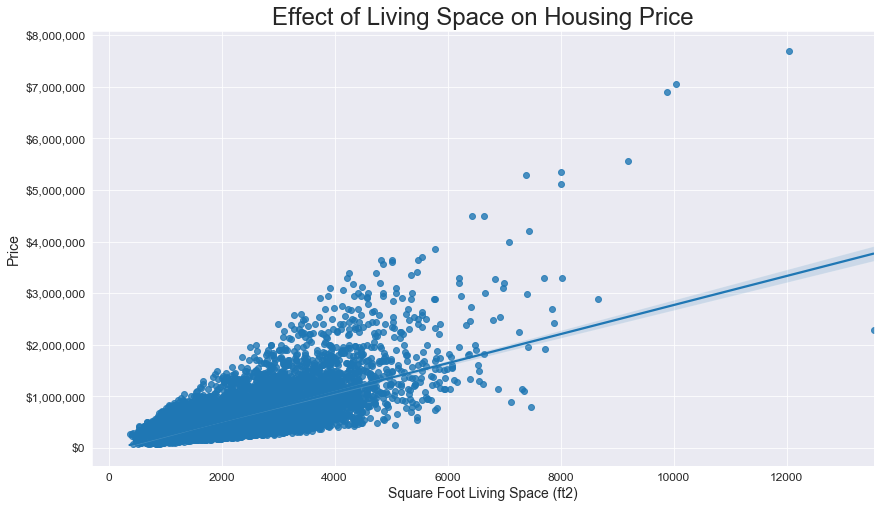

In [8]:
fig, ax = plt.subplots(figsize = (14,8))
ax = sns.regplot(X_train.sqft_living, y_train)
ax.set_xlabel('Square Foot Living Space (ft2)', fontsize = 14)
ax.set_ylabel('Price', fontsize = 14)
ax.set_title('Effect of Living Space on Housing Price', fontsize = 24)
ax.tick_params(labelsize = 14)
lrv.dollar_ticks(ax)

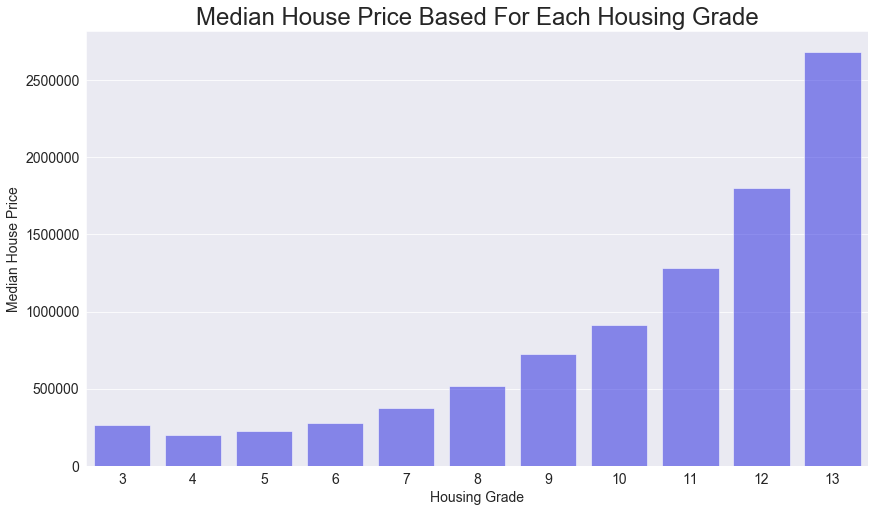

In [12]:
df = pd.concat([X_train, y_train], axis = 1)
g_grouped = df.groupby(df['grade'])['price'].median()
fig, ax = plt.subplots(figsize = (14,8))
sns.barplot(x = g_grouped.index, y = g_grouped.values, color = 'b', alpha = .5)
ax.set_xlabel('Housing Grade', fontsize = 14)
ax.set_ylabel('Median House Price', fontsize = 14)
ax.set_title('Median House Price Based For Each Housing Grade', fontsize = 24)
ax.tick_params(labelsize = 14);

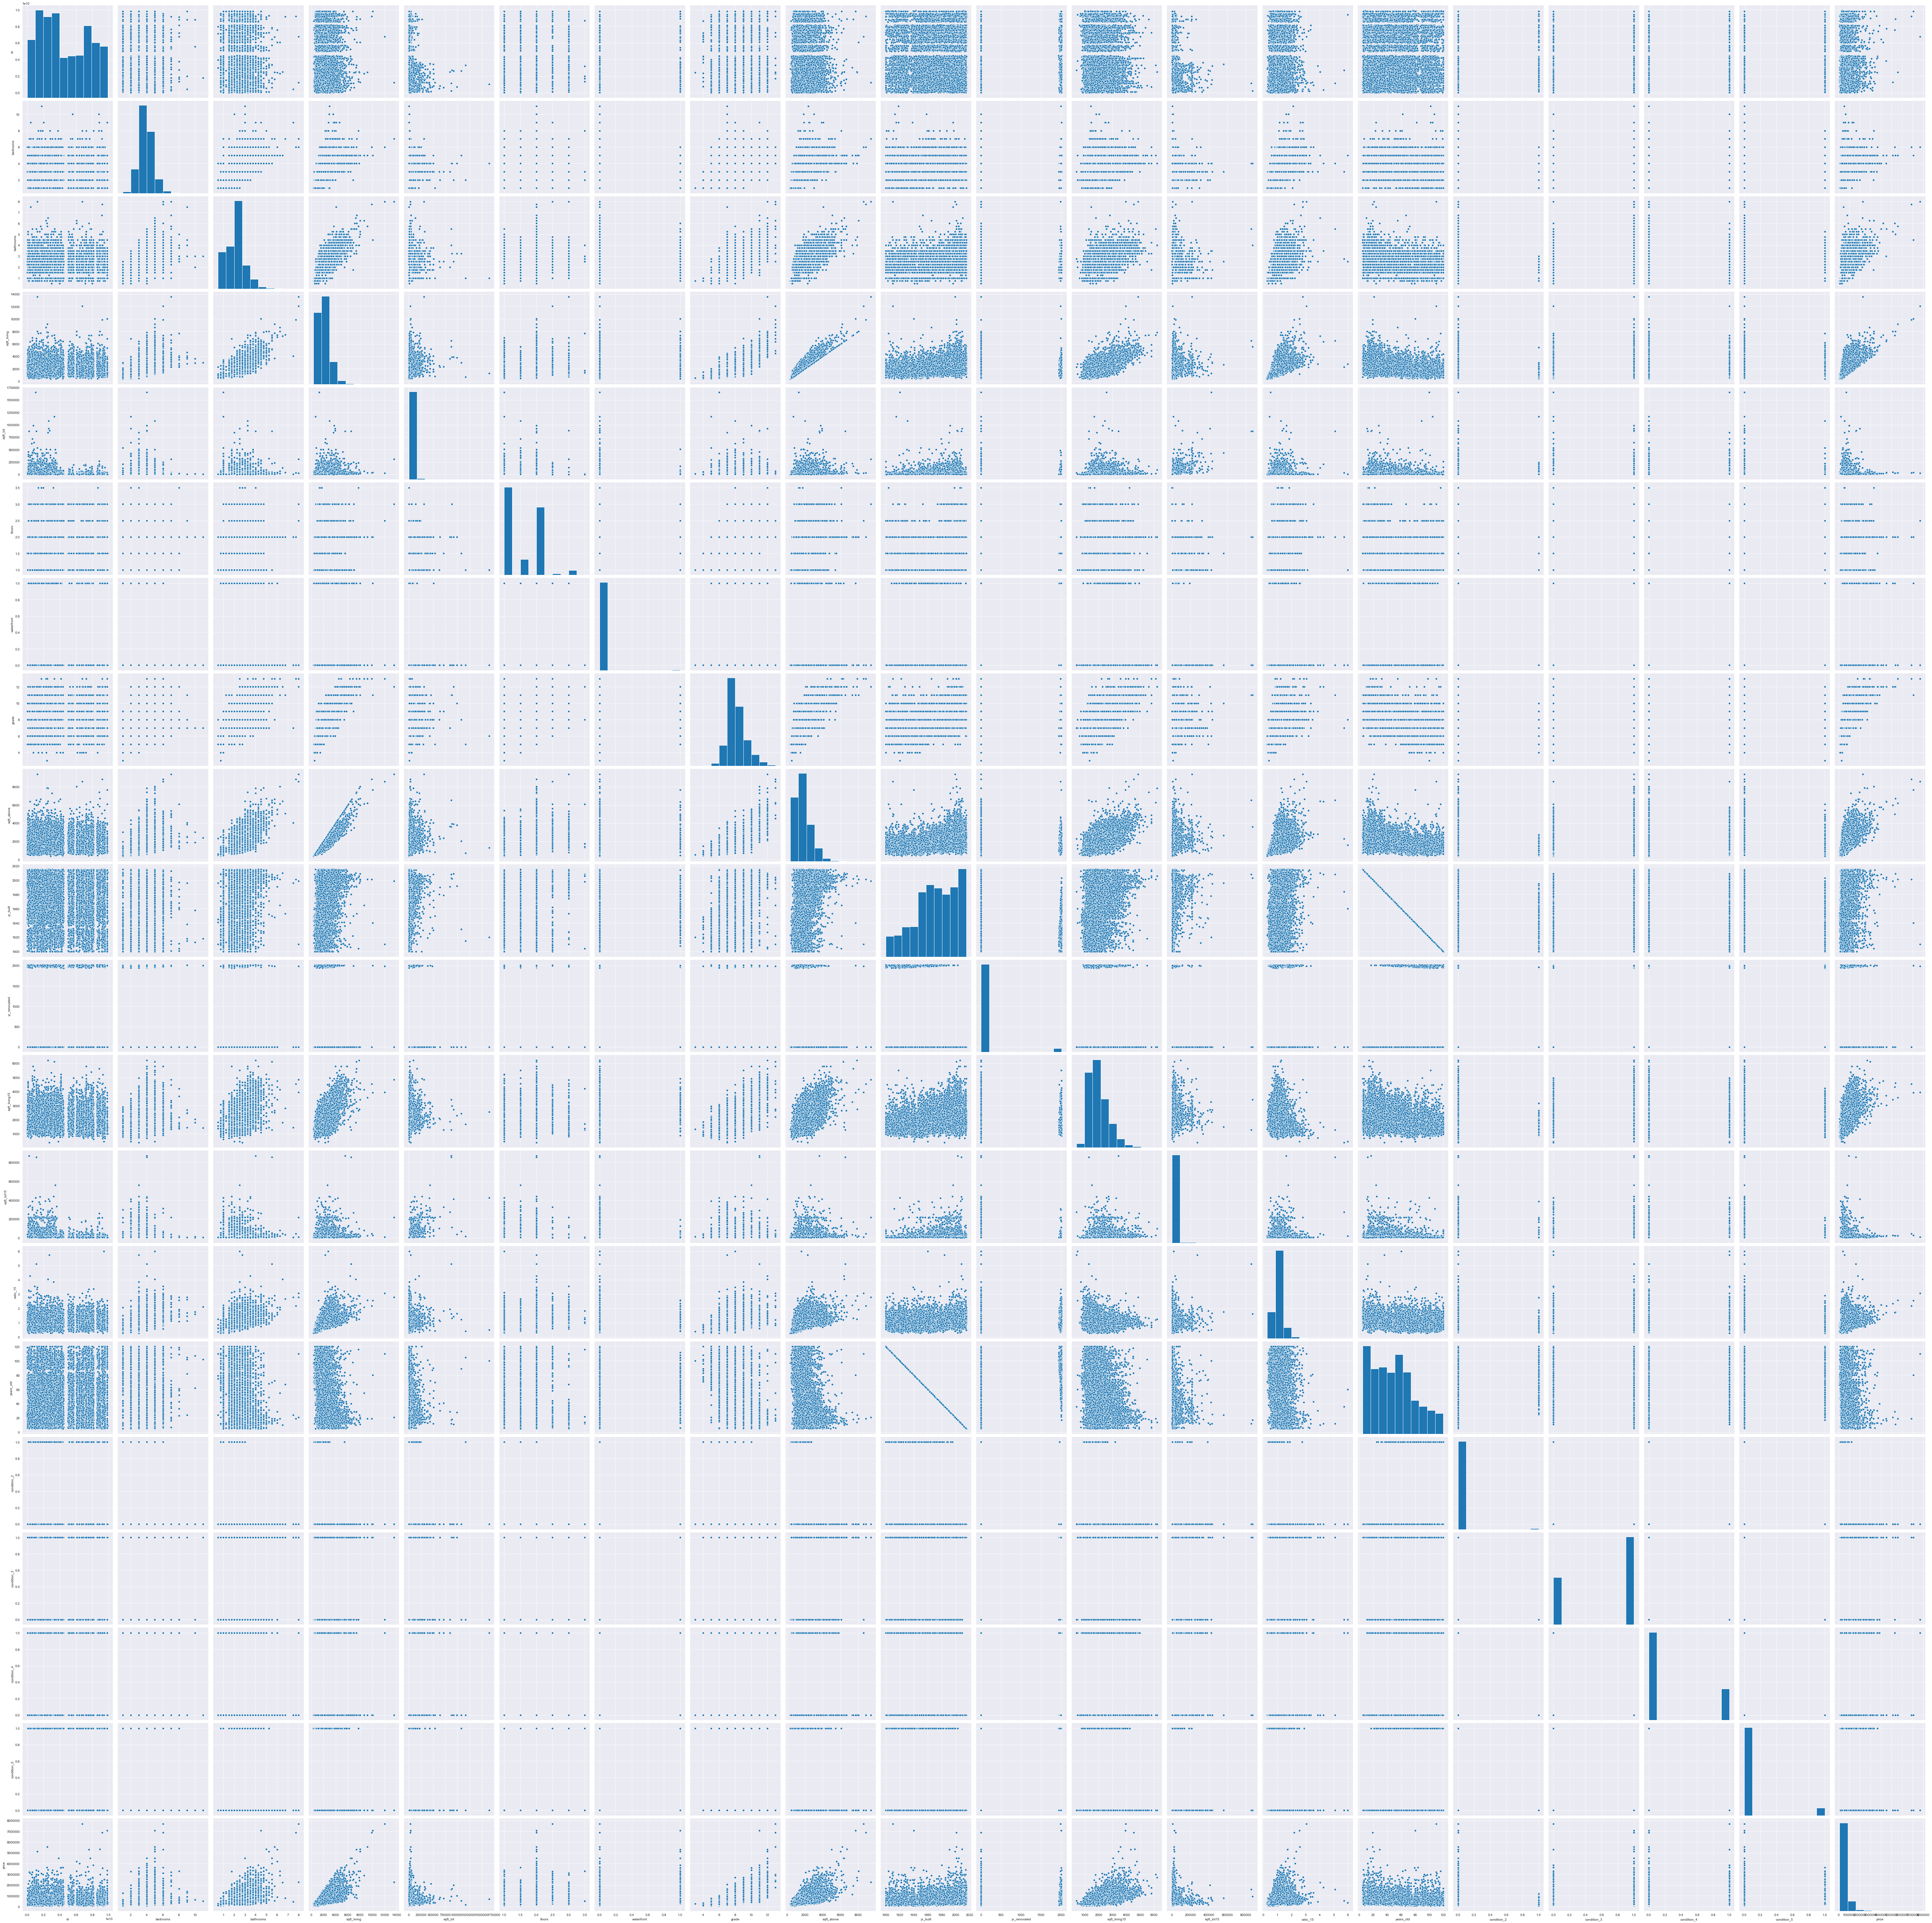

In [9]:
df = pd.concat([X_train, y_train], axis = 1)
sns.pairplot(df, height = 4)

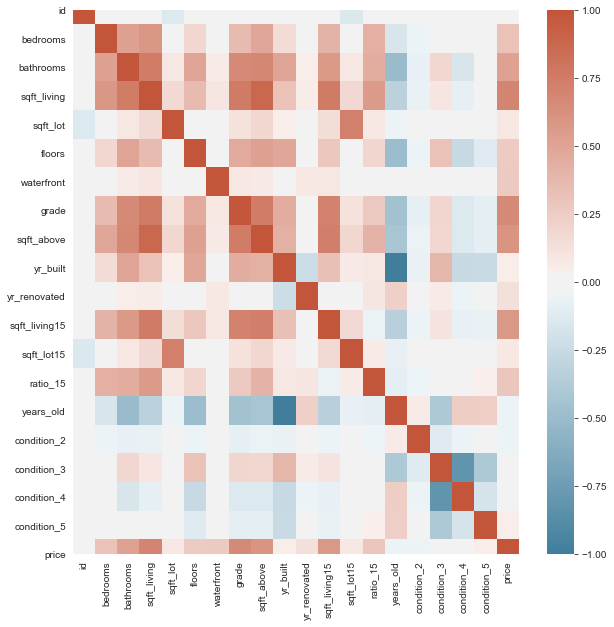

In [13]:
fig,ax = plt.subplots(figsize = (10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), cmap = cmap)

## Evaluation  <a id="Evaluation"></a>

Evaluate how well your work solves the stated business problem.

Questions to consider:

How do you interpret the results?
How well does your model fit your data? How much better is this than your baseline model?
How confident are you that your results would generalize beyond the data you have?
How confident are you that this model would benefit the business if put into use?

***

## Conclusion  <a id="Conclusion"></a>

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

What would you recommend the business do as a result of this work?
What are some reasons why your analysis might not fully solve the business problem?
What else could you do in the future to improve this project?

***
